In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

In [12]:
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [13]:
df.tail()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
16052,06/22/2018 04:00:00 AM,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16053,07/19/2018 06:00:00 AM,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16054,06/16/2018 04:00:00 PM,Brooklyn Bridge,2623,1161,1462,clear-day,82.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16055,07/24/2018 06:00:00 PM,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16056,07/23/2018 12:00:00 AM,Brooklyn Bridge,57,20,37,cloudy,75.0,0.0103,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hour_beginning     16057 non-null  object 
 1   location           16057 non-null  object 
 2   Pedestrians        16057 non-null  int64  
 3   Towards Manhattan  16057 non-null  int64  
 4   Towards Brooklyn   16057 non-null  int64  
 5   weather_summary    16041 non-null  object 
 6   temperature        16041 non-null  float64
 7   precipitation      16041 non-null  float64
 8   lat                16057 non-null  float64
 9   long               16057 non-null  float64
 10  events             1124 non-null   object 
 11  Location1          16057 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 1.5+ MB


In [15]:
df.duplicated().sum()

0

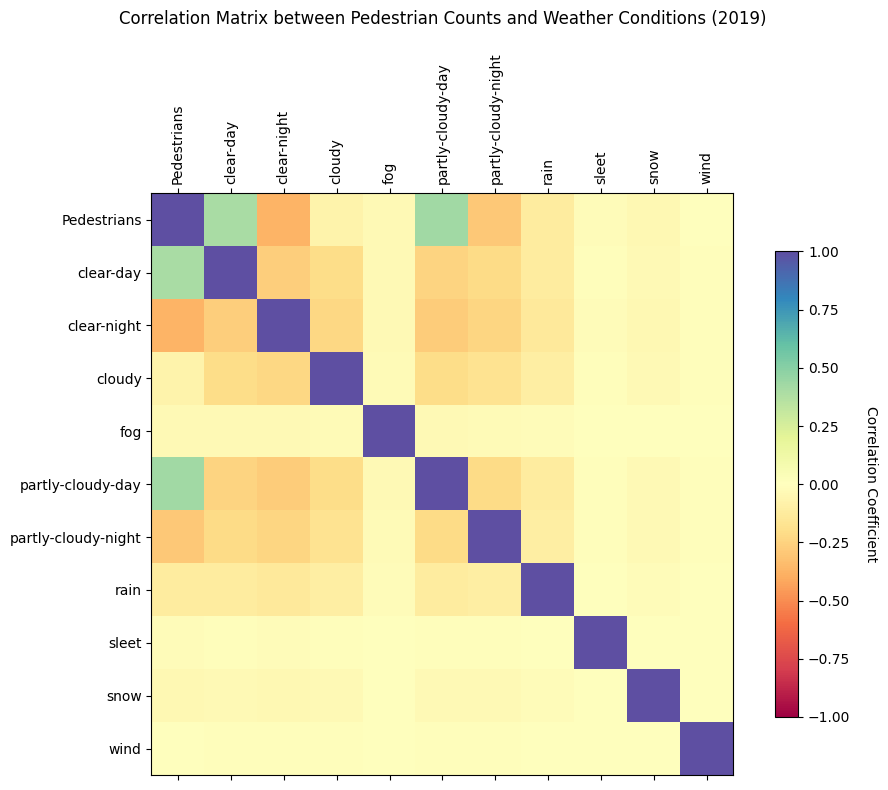

In [29]:
# Data preprocessing: Handle missing values by dropping rows with missing 'Pedestrians' or 'weather_summary'
df_cleaned = df.dropna(subset=['Pedestrians', 'weather_summary'])

# Sorting the data by weather summary
df_sorted_by_weather = df_cleaned.sort_values(by='weather_summary')

# Converting 'weather_summary' to one-hot encoding
weather_one_hot_encoded = pd.get_dummies(df_sorted_by_weather['weather_summary'])

merged_data = pd.concat([df_sorted_by_weather['Pedestrians'], weather_one_hot_encoded], axis=1)

correlation_matrix = merged_data.corr()

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(correlation_matrix, cmap='Spectral', vmin=-1, vmax=1)

cbar = fig.colorbar(cax, ax=ax, shrink=0.8)
cbar.set_label('Correlation Coefficient', rotation=270, labelpad=20)

ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticklabels(correlation_matrix.columns)

plt.title('Correlation Matrix between Pedestrian Counts and Weather Conditions (2019)', pad=20)
plt.tight_layout()
plt.show()

In [53]:
# Data preprocessing: Handle missing values by dropping rows with missing 'hour_beginning'
df = df.dropna(subset=['hour_beginning'])

df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour_beginning'].dt.hour.apply(categorize_time_of_day)

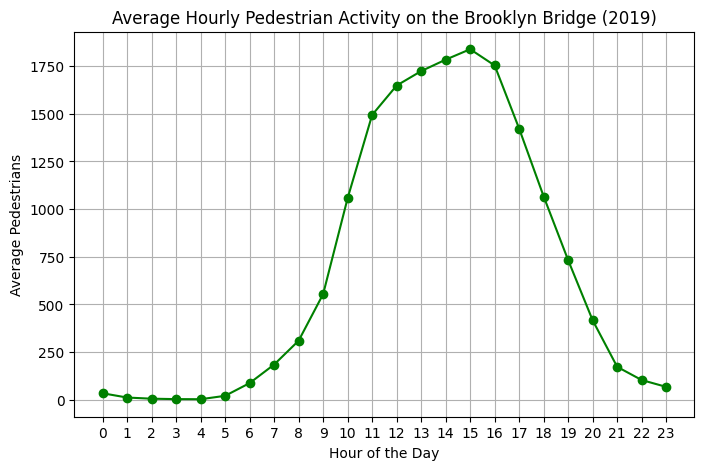

In [52]:
# **1. Hourly Pedestrian Activity**
# Group by hour to show activity across different hours of the day

hourly_activity = df.groupby(df['hour_beginning'].dt.hour)['Pedestrians'].mean()

plt.figure(figsize=(8, 5))
hourly_activity.plot(kind='line', color='green', marker='o')
plt.title('Average Hourly Pedestrian Activity on the Brooklyn Bridge (2019)')
plt.ylabel('Average Pedestrians')
plt.xlabel('Hour of the Day')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


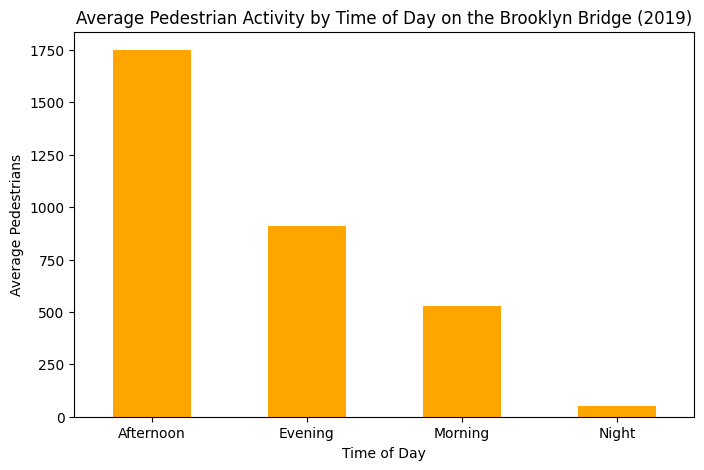

In [47]:
# **2. Activity by Time of Day**
# Group by the time_of_day and calculate the mean pedestrian count

activity_by_time_of_day = df.groupby('time_of_day')['Pedestrians'].mean()

plt.figure(figsize=(8, 5))
activity_by_time_of_day.plot(kind='bar', color='orange')
plt.title('Average Pedestrian Activity by Time of Day on the Brooklyn Bridge (2019)')
plt.ylabel('Average Pedestrians')
plt.xlabel('Time of Day')
plt.xticks(rotation=0)
plt.show()

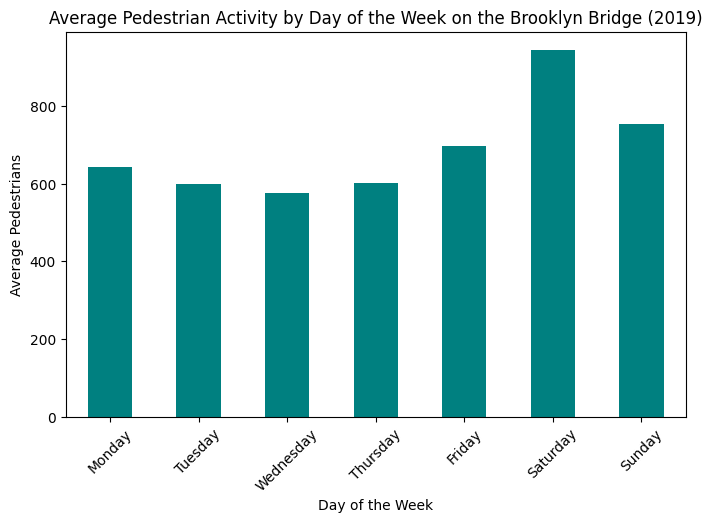

In [51]:
# **4. Activity by Day of the Week**
# Extract the day of the week and group by it to analyze pedestrian activity

df['day_of_week'] = df['hour_beginning'].dt.day_name()
activity_by_day_of_week = df.groupby('day_of_week')['Pedestrians'].mean()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
activity_by_day_of_week = activity_by_day_of_week[days_order]

plt.figure(figsize=(8, 5))
activity_by_day_of_week.plot(kind='bar', color='teal')
plt.title('Average Pedestrian Activity by Day of the Week on the Brooklyn Bridge (2019)')
plt.ylabel('Average Pedestrians')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.show()